In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
# Select relevant features
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the data
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## K-Means Clustering for Customer Segmentation

In [8]:
from sklearn.cluster import KMeans

# applying kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42,n_init="auto")
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2


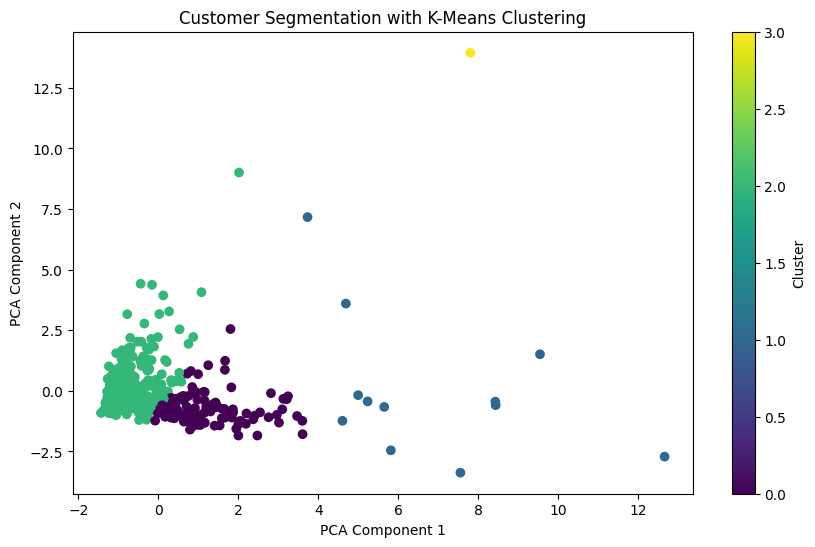

In [19]:
# Reduce dimensions for visualization (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## Evaluating the Optimal Number of Clusters

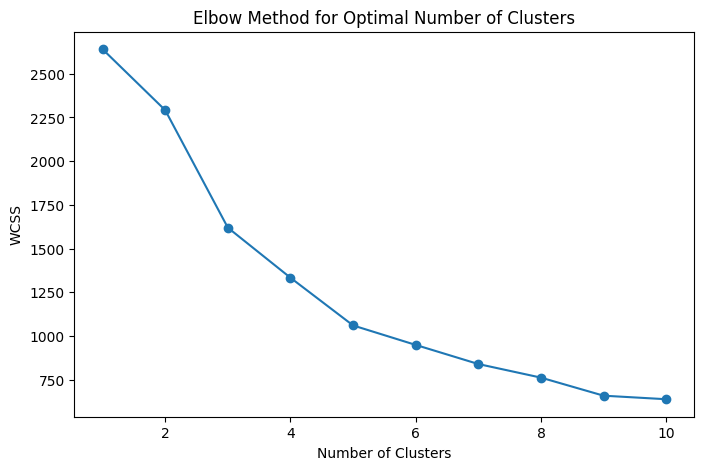

In [11]:
## Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


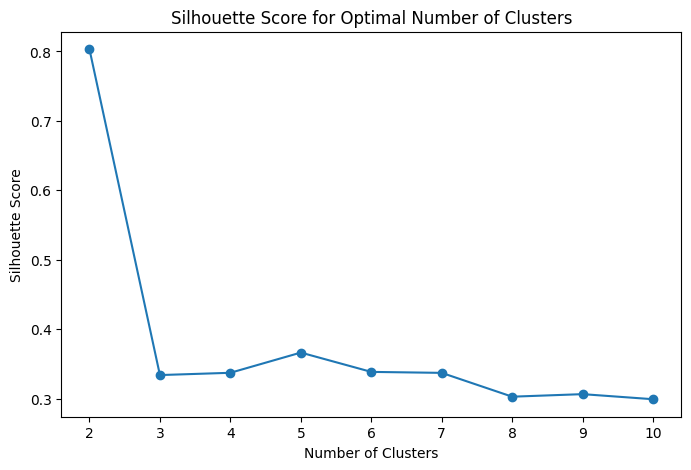

In [12]:
# Silhouette Method
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init="auto")
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


##  Cluster Analysis and Interpretation

In [13]:
# Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.853211,2.550459,5635.770642,10034.577982,15765.623853,1457.587156,6768.009174,1737.614679
1,1.916667,2.583333,24847.750000,34427.916667,43794.666667,4370.416667,21503.083333,4541.750000
2,1.119497,2.537736,13618.905660,3143.091195,3881.770440,3471.050314,854.930818,1192.135220
3,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


## Hierarchical Clustering: Dendrogram and Cluster Formation

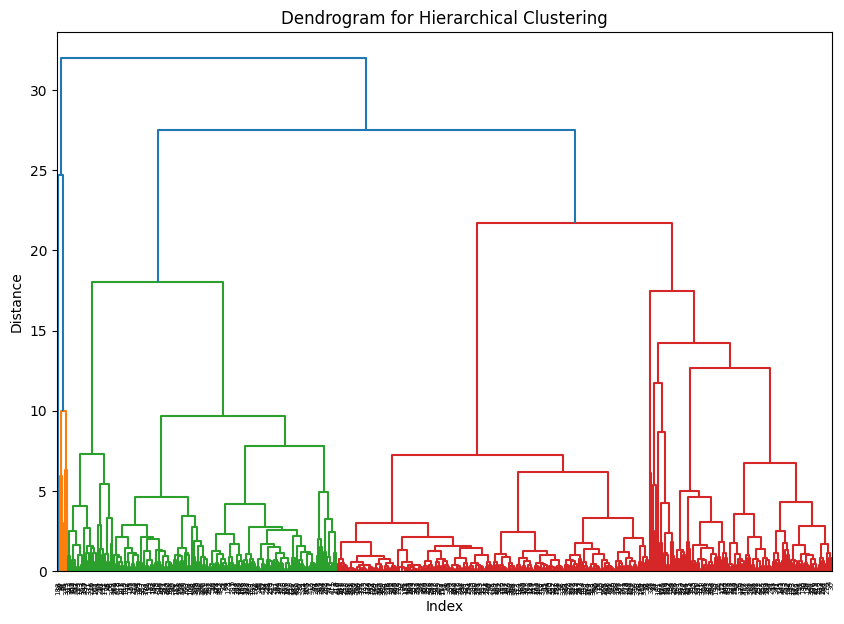

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute the linkage matrix
linkage_matrix = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()



In [15]:
# Determine clusters
max_d = 5  # Cut-off distance for clusters (adjust as needed)
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, max_d, criterion='distance')


In [16]:
# Compare K-Means and Hierarchical clusters
comparison = df[['Cluster', 'Hierarchical_Cluster']].value_counts()
print(comparison)


Cluster  Hierarchical_Cluster
2        12                      88
0        9                       54
2        14                      48
         13                      41
         10                      38
         21                      30
         23                      30
         22                      25
0        10                      23
         6                       17
2        19                       9
         11                       6
0        11                       6
1        7                        4
0        8                        4
         23                       4
1        1                        2
2        15                       1
         17                       1
         16                       1
1        20                       1
         18                       1
         8                        1
         4                        1
         3                        1
         2                        1
0        17                       

## Comparison of Clustering Results


In [21]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg_kmeans = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_avg_kmeans}')


Silhouette Score for K-Means: 0.3371935666756086


In [23]:
# Calculate silhouette score for hierarchical clusters
silhouette_avg_hierarchical = silhouette_score(scaled_features, df['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}')


Silhouette Score for Hierarchical Clustering: 0.20478519509585694


# Scores Interpretation in terms of cohesion and separation:

Silhouette Score = -1 to +1
- +1 = Closely clustered
-  0  = close to the cluster
- -1 = incorrectly clustered

K-Means Score (0.337): This indicates moderate cluster cohesion and separation. While not exceptionally high, it suggests that K-Means has managed to create reasonably well-separated clusters. It’s a positive sign that the clusters are somewhat distinct and relatively cohesive.

Hierarchical Clustering Score (0.205): This is lower compared to K-Means, suggesting that the clusters formed by hierarchical clustering are less well-separated and cohesive. This could be due to the method’s tendency to create clusters with less distinct boundaries or varying densities.